# B.Tech 2016-20 Electrical Enginnering (Spring 2018)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import json
from scipy.stats import norm

In [21]:
with open('stres.json') as f:
    data = json.load(f)
    # Filter out 16EE data
    data = {k:v for (k,v) in data.items() if '16ME01' in k[:6]}
    
for (k,v) in data.items():
    try:
        print(k,v['cgpa'][1])
    except:
        pass
    
with open('course.json') as c:
    cdata = json.load(c)
    
print ("Total Stuents: %s" % len(data))


16ME01007 7.98
16ME01006 8.04
16ME01005 7.60
16ME01004 9.21
16ME01003 8.04
16ME01002 8.26
16ME01001 6.81
16ME01009 8.77
16ME01008 6.48
16ME01019 8.40
16ME01011 7.06
16ME01012 8.32
16ME01014 8.21
16ME01017 6.67
16ME01040 6.02
16ME01021 7.83
16ME01023 7.38
16ME01022 8.49
16ME01025 5.87
16ME01024 6.36
16ME01027 7.30
16ME01026 7.32
16ME01029 7.79
16ME01028 6.89
16ME01032 6.47
16ME01033 6.72
16ME01030 7.02
16ME01031 8.19
16ME01036 6.02
16ME01037 6.49
16ME01034 5.68
16ME01038 6.91
16ME01039 6.30
16ME01041 7.09
Total Stuents: 34


## Date of Birth analysis

In [3]:
dob = [v['dob'] for (k, v) in data.items()]

np_dob = (np.array(dob, dtype='datetime64[s]').view('i8'))
average_dob = np.mean(np_dob).astype('datetime64[s]').astype(dt.datetime)
median_dob  = np.median(np_dob).astype('datetime64[s]').astype(dt.datetime)
minimum_dob = np.min(np_dob).astype('datetime64[s]').astype(dt.datetime)
maximum_dob = np.max(np_dob).astype('datetime64[s]').astype(dt.datetime)
print (" Average: %s" % average_dob.strftime("%8B %d, %Y"))
print ("  Median: %s" % median_dob.strftime("%8B %d, %Y"))
print ("  Oldest: %s" % minimum_dob.strftime("%8B %d, %Y"))
print ("Youngest: %s" % maximum_dob.strftime("%8B %d, %Y"))

 Average:     June 09, 1998
  Median:     June 06, 1998
  Oldest:    March 25, 1997
Youngest:   August 17, 1999


## Branch Change Analysis

In [18]:
original_strengeth = 40
bc_cgpa = [v['cgpa'][1] for (k, v) in data.items() if (int(k[-2:]) > 40 and v['cgpa'][1] !='WH')]
cgpa = [v['cgpa'][2] for (k,v) in data.items() if v['cgpa'][2] != 'WH' ]

bc_cgpa = (np.array(bc_cgpa, dtype='float'))
cgpa = (np.array(cgpa, dtype='float'))

if len(bc_cgpa>0):
    bc_count = bc_cgpa.size
    bc_highest = np.max(bc_cgpa)
    bc_lowest = np.min(bc_cgpa)
    bc_average = np.mean(bc_cgpa)
    bc_median = np.median(bc_cgpa)
    bc_std = np.std(bc_cgpa)
    print ("Total branch changers: %s" % bc_count)
    print ("\nCGPA (after 2nd sem) for branch change:-")
    print ("Highest: %s" % bc_highest)
    print (" Lowest: %s" % bc_lowest)
    print ("Average: %s" % bc_average)
    print (" Median: %s" % bc_median)
    print("Standard Deviation: %s " %bc_std)
else:
    print('no branch changer')
    pass

Total branch changers: 1

CGPA (after 2nd sem) for branch change:-
Highest: 7.09
 Lowest: 7.09
Average: 7.09
 Median: 7.09
Standard Deviation: 0.0 


## Course wise analysis

In [19]:
courses = dict()
for (k, v) in data.items():
    for (sem, scourses) in v['grades'].items():
        for (course, grade) in scourses.items():
            if course not in courses:
                courses[course] = list()
                courses[course].append(grade)
            else:
                courses[course].append(grade)

clist = list()

def other_grade(l):
    return len(l) - l.count('EX') - l.count('A') - l.count('B') - l.count('C') - l.count('D') - l.count('P') - l.count('F') - l.count('WH')

def analyze_grade(l):
    grade_hash = {'EX': 10, 'A': 9, 'B': 8, 'C': 7, 'D': 6, 'P': 5, 'F': 5}
    hashed_grade = list()
    for grade in l:
        if grade in grade_hash:
            hashed_grade.append(grade_hash[grade])
    hashed_grade = (np.array(hashed_grade, dtype='float'))
    if hashed_grade.size == 0:
        return {'average': 0, 'median': 0}
    return {'average': round(np.mean(hashed_grade), 2), 'median': round(np.median(hashed_grade), 2)}

grade_labels = 'EX', 'A', 'B', 'C', 'D', 'P', 'F', 'WH', 'Other'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'red', 'gray', 'black']

for course, grades in courses.items():
    course_info = cdata[course]
    clist.append((course, course_info['subnane'], course_info['credit'], len(grades), grades.count('EX'), grades.count('A'), 
                 grades.count('B'), grades.count('C'), grades.count('D'), grades.count('P'),
                 grades.count('F'), grades.count('WH'), other_grade(grades), analyze_grade(grades)['average'], analyze_grade(grades)['median']))
#     patches, texts = plt.pie([grades.count('EX'), grades.count('A'), 
#                  grades.count('B'), grades.count('C'), grades.count('D'), grades.count('P'),
#                  grades.count('F'), grades.count('WH'), other_grade(grades)], labels=grade_labels, colors=colors)
#     plt.axis('equal')
#     plt.legend(patches, labels, loc="best")
#     plt.show()
def sortByAverage(element):
    return element[-2]

clist.sort(key=sortByAverage)
df = pd.DataFrame(data = clist)
df.columns = ['Subject Code', 'Subject Name', 'Credits', 'Students', 'EX', 'A', 'B', 'C', 'D', 'P', 'F', 'WH', 'Other', 'Average', 'Median']

df

,Subject Code,Subject Name,Credits,Students,EX,A,B,C,D,P,F,WH,Other,Average,Median
0,MA2L004,Partial Differential Equations,4,34,1,2,3,2,3,17,5,1,0,5.88,5.0
1,ME1L001,Mechanics,4,34,0,1,5,8,10,10,0,0,0,6.32,6.0
2,EC2L005,Analog Communication,4,34,1,2,6,8,4,6,7,0,0,6.50,6.5
3,PH1L001,Physics,4,34,0,1,5,12,11,4,1,0,0,6.59,7.0
4,CE2L011,Building materials and Construction,3,6,0,0,1,2,1,1,0,1,0,6.60,7.0
5,HS2L002,Speaking and Presentation,4,13,0,0,3,3,6,1,0,0,0,6.62,6.0
6,ID2L001,Entrepreneurship and Small Business Management,3,40,1,4,6,11,8,7,2,1,0,6.77,7.0
7,EE2L004,Introduction to Electromagnetic Engineering,3,7,0,2,0,2,1,2,0,0,0,6.86,7.0
8,ME2L003,Thermodynamics,3,34,1,2,8,8,9,5,0,1,0,6.88,7.0
9,MA1L002,Mathematics - II,4,34,1,5,9,5,4,10,0,0,0,6.94,7.0


## CGPA Analysis

Top 5 Students:

16ME01004  ABHISHEK MISHRA  9.34
16ME01009  VIMAL SHARMA  8.65
16ME01019  RAJNEESH AWASTHI  8.59
16ME01014  SHIVAM SHARMA  8.53
16ME01031  METTA SRIRAM  8.43

CGPA:
Highest: 9.34
lowest: 5.21
 Median: 7.3
Average: 7.22
Standard Deviation: 1.06 

   9.5+: 0
  9-9.5: 1
  8.5-9: 3
  8-8.5: 5
  7.5-8: 5
  7-7.5: 8
     7-: 12




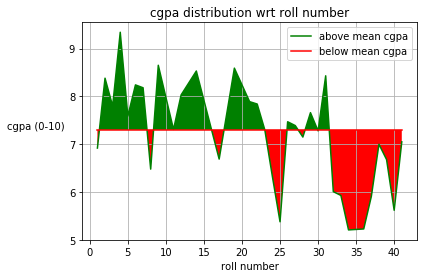

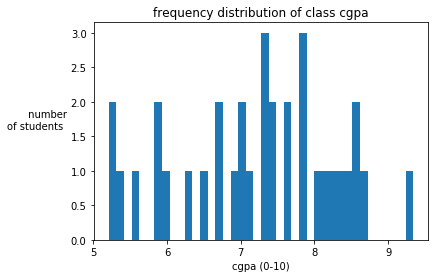

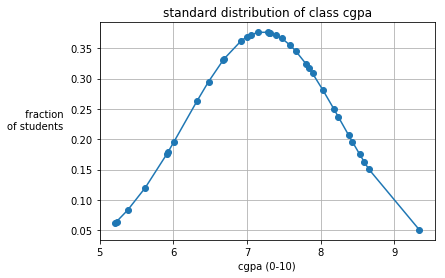

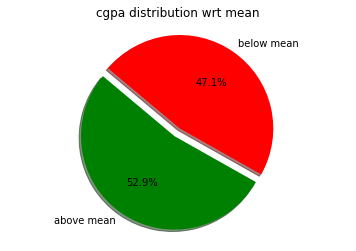

In [23]:

roll_and_cgpa = []
for (k, v) in data.items():
    try:
        roll_and_cgpa.append((k,float(v['cgpa'][2])))
    except:
        pass

    

def sortbycg(l):
   return l[1]

def sortbyroll(l):
    return int(l[0][7:9])


sorted_cgpa = roll_and_cgpa[:]
sorted_cgpa.sort(key=sortbycg)


print("Top 5 Students:\n")
for element in sorted_cgpa[:-6:-1]:
    print('%s '%(element[0]),'%s ' % (data[element[0]]['name']),'%s' %(data[element[0]]['cgpa'][2]))
    
roll_and_cgpa.sort(key=sortbyroll)

# for individual cgpa 

#print("Students with their cgpa :\n")
# for element in roll_and_cgpa:
#   #   print('%s '%(element[0]),'%s ' % (data[element[0]]['name']),'%s' %(data[element[0]]['cgpa'][2]))

cgpa = np.array([element[1] for element in roll_and_cgpa], dtype='float')

roll = np.array([element[0][7:9] for element in roll_and_cgpa],dtype='int')


cgpa_average = round(np.mean(cgpa), 2)
cgpa_median = round(np.median(cgpa), 2)
cgpa_highest = round(np.max(cgpa), 2)
cgpa_lowest = round(np.min(cgpa),2)
cgpa_standard_deviation = round(np.std(cgpa),2)

print("\nCGPA:")
print("Highest: %s" % cgpa_highest)
print("lowest: %s"% cgpa_lowest)
print(" Median: %s" % cgpa_median)
print("Average: %s" % cgpa_average)
print("Standard Deviation: %s \n"% cgpa_standard_deviation)

print("   9.5+: %s" % len([cg for cg in cgpa if cg >= 9.5]))
print("  9-9.5: %s" % len([cg for cg in cgpa if cg >= 9 and cg < 9.5]))
print("  8.5-9: %s" % len([cg for cg in cgpa if cg >= 8.5 and cg < 9]))
print("  8-8.5: %s" % len([cg for cg in cgpa if cg >= 8 and cg < 8.5]))
print("  7.5-8: %s" % len([cg for cg in cgpa if cg >= 7.5 and cg < 8]))
print("  7-7.5: %s" % len([cg for cg in cgpa if cg >= 7 and cg < 7.5]))
print("     7-: %s" % len([cg for cg in cgpa if cg < 7]))


unit_array = np.ones(len(roll),dtype='int')
fig,cgpa_plot = plt.subplots()

print('\n')

label=['above mean','below mean']
cgpa_plot.plot(roll,cgpa,label='above mean cgpa',color='green')
cgpa_plot.plot(roll,cgpa_median*unit_array,label='below mean cgpa',color='red')
cgpa_plot.grid(b = True)
cgpa_plot.legend()
cgpa_plot.fill_between(roll,cgpa,cgpa_median*unit_array,where= cgpa >= cgpa_median*unit_array,facecolor = 'green',interpolate = True )
cgpa_plot.fill_between(roll,cgpa,cgpa_median*unit_array,where= cgpa< cgpa_median*unit_array,facecolor = 'red',interpolate = True )
plt.xlabel('roll number')
plt.ylabel('cgpa (0-10)', horizontalalignment='right',rotation =0)
plt.title('cgpa distribution wrt roll number')
plt.show()

print('\n')
#plt.fill(cgpa,cgpa_median*median,'r')g
sorted_cgpa=cgpa[:]
sorted_cgpa.sort()
fig,histo_cgpa = plt.subplots()
histo_cgpa.hist(sorted_cgpa,bins=40)
#histo_cgpa.fill_between(roll,histo_cgpa,where =sorted_cgpa >= 8.0,facecolor = 'green',interpolate = True )
#histo_cgpa.fill(histo_cgpa, where = sorted_cgpa >= cgpa_median)
plt.title('frequency distribution of class cgpa')

plt.xlabel('cgpa (0-10)')
plt.ylabel(' number\nof students ', horizontalalignment='right',rotation =0)
plt.show()
#plt.plot(norm.pdf(cgpa_in_seq,cgpa_median,cgpa_standard_deviation))

print('\n')
fig = norm.pdf(sorted_cgpa, np.mean(sorted_cgpa), np.std(sorted_cgpa))
plt.plot(sorted_cgpa,fig,'-o')
plt.title('standard distribution of class cgpa')
plt.xlabel('cgpa (0-10)')
plt.ylabel(' fraction \nof students ', horizontalalignment='right',rotation =0)
plt.grid(b = True)
plt.show()

above_mean = [cg for cg in cgpa if cg >= cgpa_median]
below_mean = [cg for cg in cgpa if cg < cgpa_median]

print('\n')
labels = 'above mean','below mean'
sizes = [len(above_mean),len(below_mean)]
#print(len(above_mean),len(below_mean))
explode = (0.1,0)
colors = ['green','red']
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%2.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('cgpa distribution wrt mean')
plt.show()

# results plot 
this class has lowest median among all other department batches.This is because of poor performance of students in roll number from 31 to 40.These students should be supported in improving their academic performance.



https://analytics4all.org/2016/05/05/python-histograms-and-frequency-distribution/

https://etav.github.io/python/count_basic_freq_plot.html for histogram frequency distribution

https://stackoverflow.com/questions/20011494/plot-normal-distribution-with-matplotlib for ploting the standard deviation